In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import suraj_datalab as sd

# Set display options
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [4]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
print(train.shape)
print(test.shape)

(19219, 35)
(12814, 28)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [7]:
train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [9]:
train.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [10]:
target_features = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [11]:
# Drop the id column
train.drop(['id'], axis=1, inplace=True)

# drop the target features
train.drop(target_features, axis=1, inplace=True)

In [12]:
for col in train.columns:
    print(f"{col}: {train[col].nunique()}")

X_Minimum: 1191
X_Maximum: 1259
Y_Minimum: 3345
Y_Maximum: 3341
Pixels_Areas: 1154
X_Perimeter: 460
Y_Perimeter: 331
Sum_of_Luminosity: 2595
Minimum_of_Luminosity: 162
Maximum_of_Luminosity: 98
Length_of_Conveyer: 99
TypeOfSteel_A300: 2
TypeOfSteel_A400: 2
Steel_Plate_Thickness: 27
Edges_Index: 1849
Empty_Index: 1748
Square_Index: 1118
Outside_X_Index: 525
Edges_X_Index: 1102
Edges_Y_Index: 900
Outside_Global_Index: 4
LogOfAreas: 1072
Log_X_Index: 206
Log_Y_Index: 241
Orientation_Index: 1598
Luminosity_Index: 2046
SigmoidOfAreas: 467


In [13]:
cat_cols = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']
num_cols = [col for col in train.columns if col not in cat_cols]

In [14]:
for col in cat_cols:
    print(f"{col}: {train[col].unique()}")

TypeOfSteel_A300: [0 1]
TypeOfSteel_A400: [1 0]
Outside_Global_Index: [0.  1.  0.5 0.7]


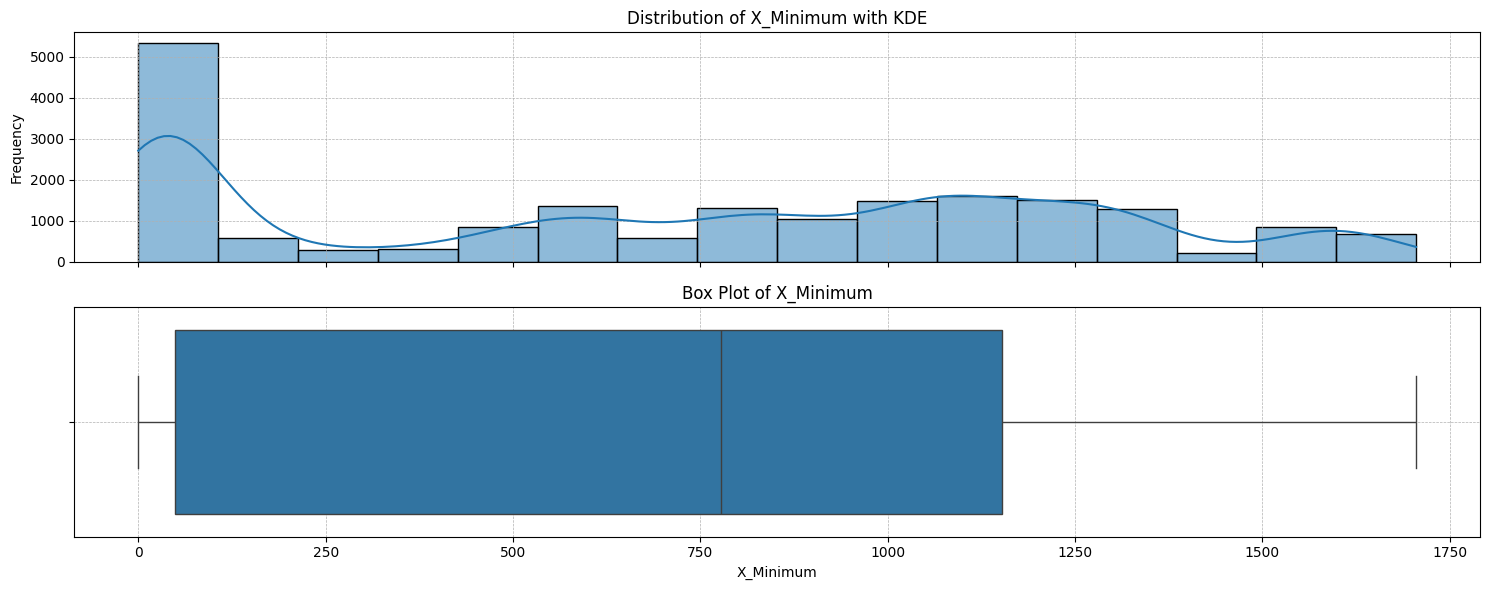

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
X_Minimum_Overall,19219.0,709.854675,531.544189,0.0,49.0,777.0,1152.0,1705.0
X_Minimum_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_Minimum_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


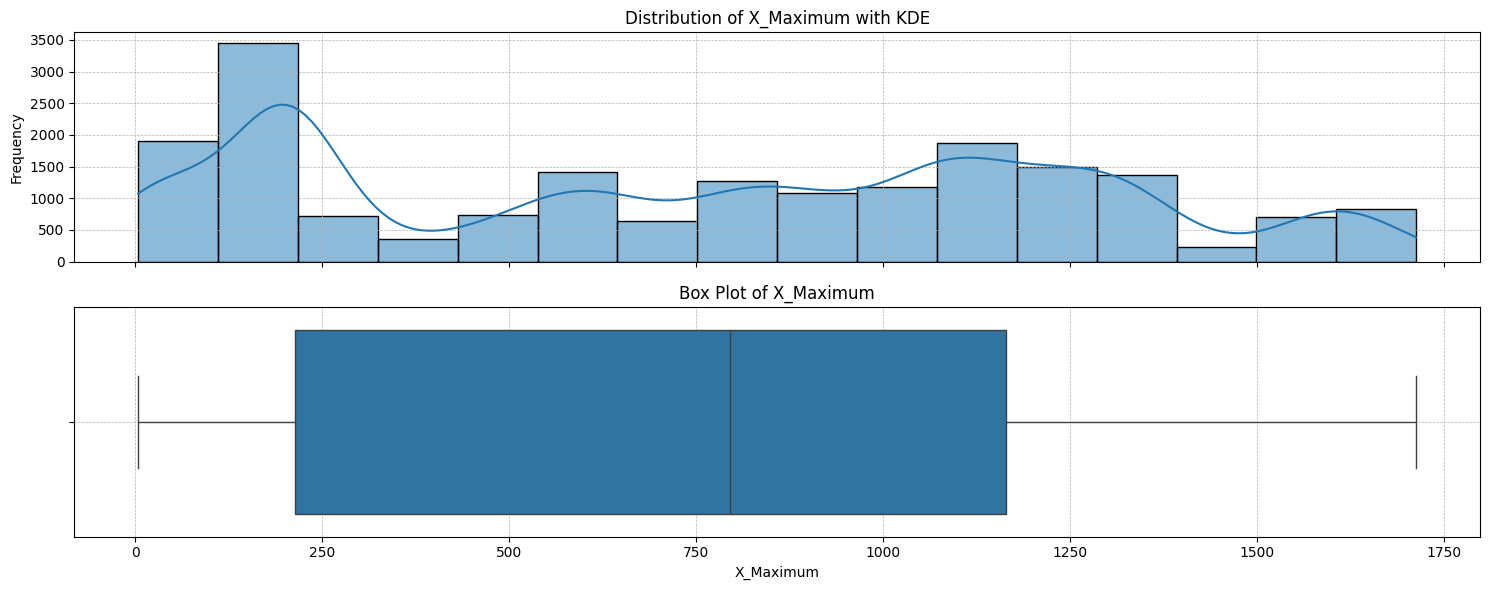

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
X_Maximum_Overall,19219.0,753.857641,499.836603,4.0,214.0,796.0,1165.0,1713.0
X_Maximum_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_Maximum_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


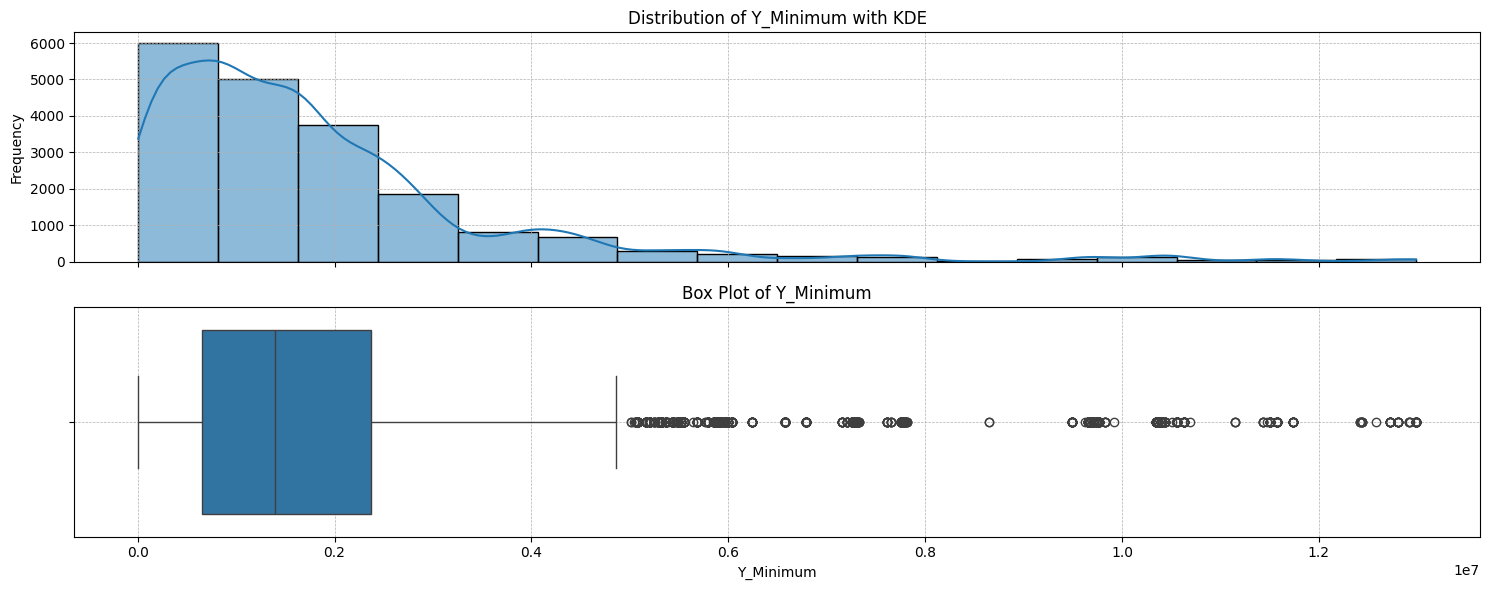

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,5.81716,0.0,5.81716


,count,mean,std,min,25%,50%,75%,max
Y_Minimum_Overall,19219.0,1.849756e+06,1.903554e+06,6712.0,657468.0,1398169.0,2368032.0,12987661.0
Y_Minimum_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Minimum_Upper_Outliers,1118.0,7.717239e+06,2.354412e+06,5015327.0,5768205.5,7261606.0,9754896.0,12987661.0


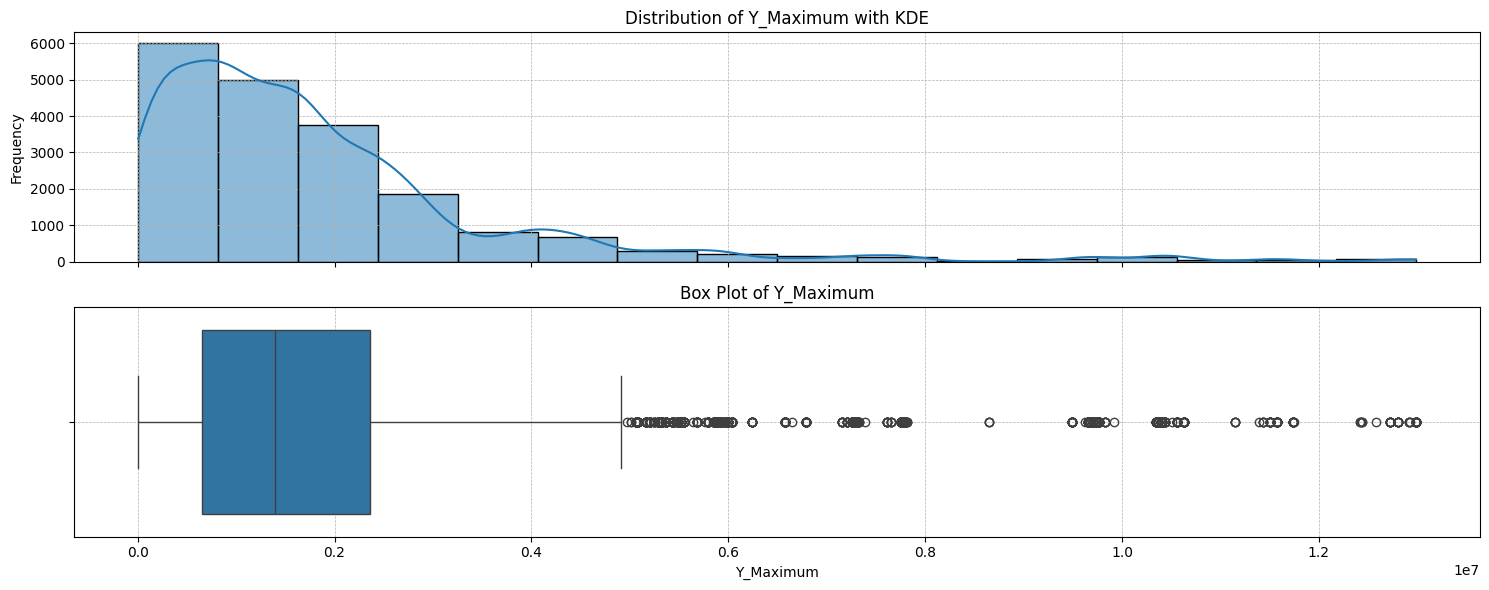

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,5.785941,0.0,5.785941


,count,mean,std,min,25%,50%,75%,max
Y_Maximum_Overall,19219.0,1.846605e+06,1.896295e+06,6724.0,657502.00,1398179.0,2362511.0,12987692.0
Y_Maximum_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Maximum_Upper_Outliers,1112.0,7.701101e+06,2.338501e+06,4972282.0,5790053.75,7261648.0,9754906.0,12987692.0


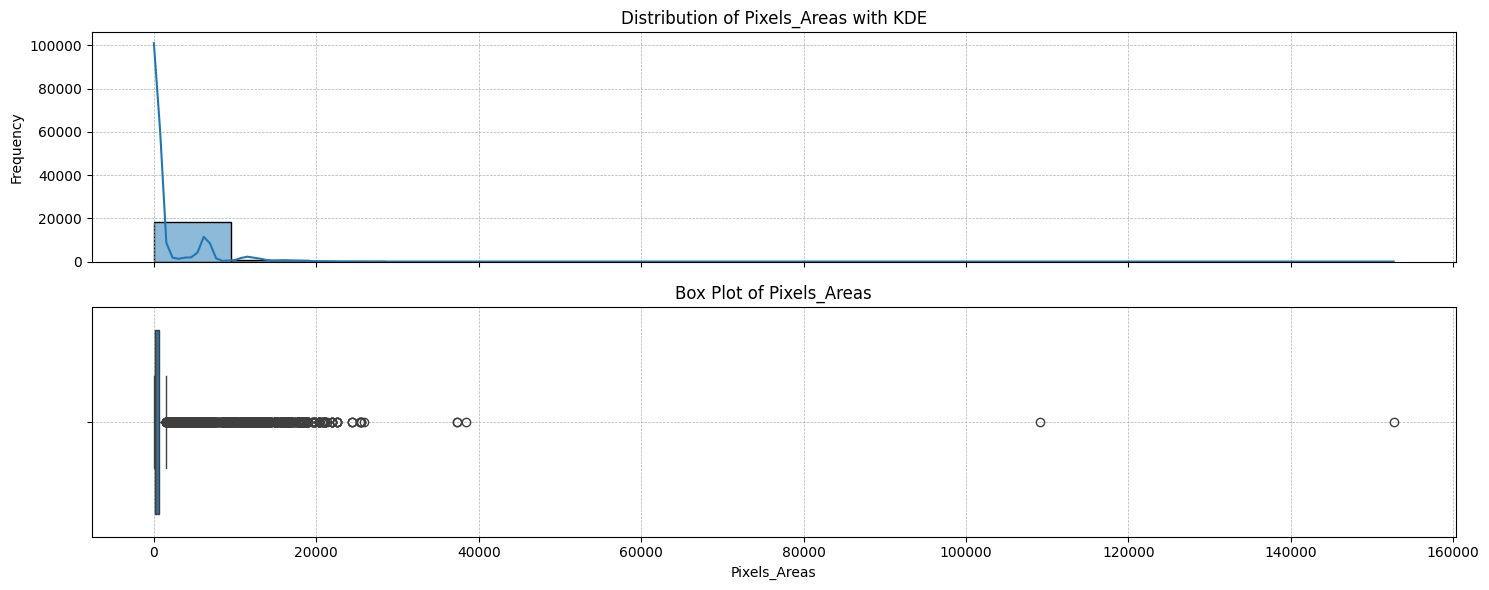

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,19.366252,0.0,19.366252


,count,mean,std,min,25%,50%,75%,max
Pixels_Areas_Overall,19219.0,1683.987616,3730.319865,6.0,89.0,168.0,653.00,152655.0
Pixels_Areas_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pixels_Areas_Upper_Outliers,3722.0,7813.223536,5005.352941,1506.0,5935.0,6476.0,10706.25,152655.0


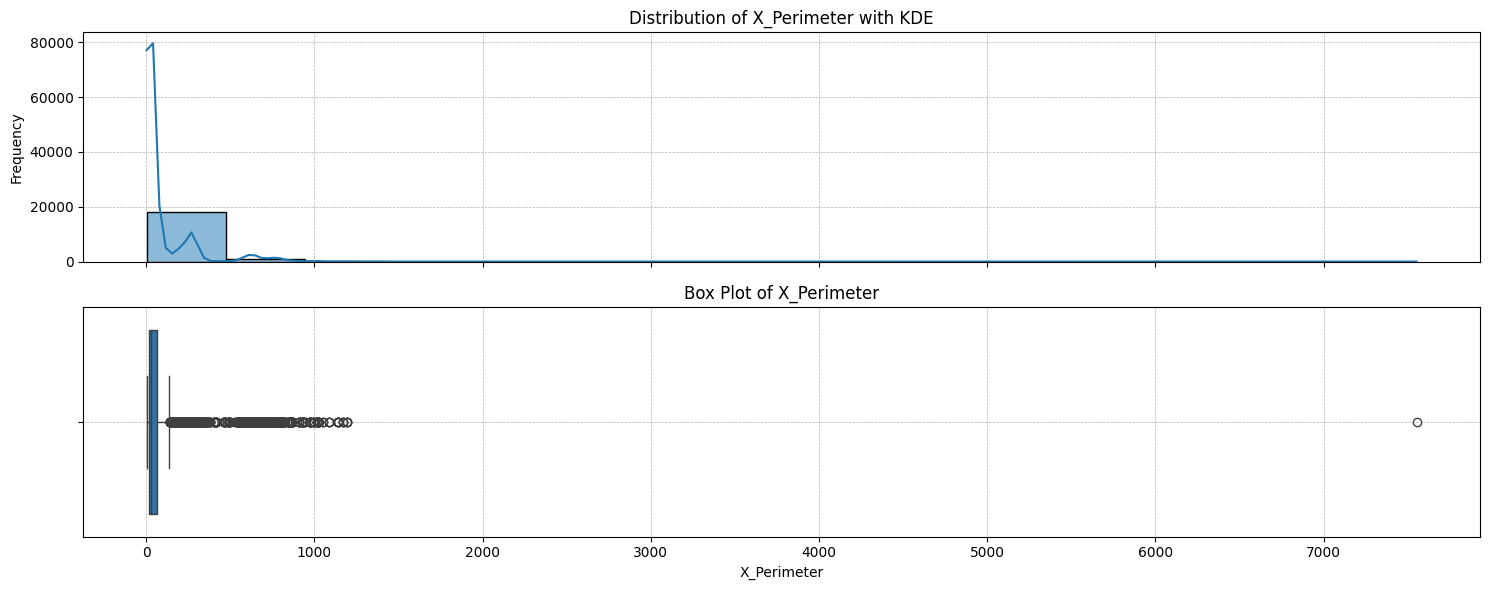

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,19.340236,0.0,19.340236


,count,mean,std,min,25%,50%,75%,max
X_Perimeter_Overall,19219.0,95.654665,177.821382,2.0,15.0,25.0,64.0,7553.0
X_Perimeter_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_Perimeter_Upper_Outliers,3717.0,381.942158,245.030878,139.0,242.0,276.0,588.0,7553.0


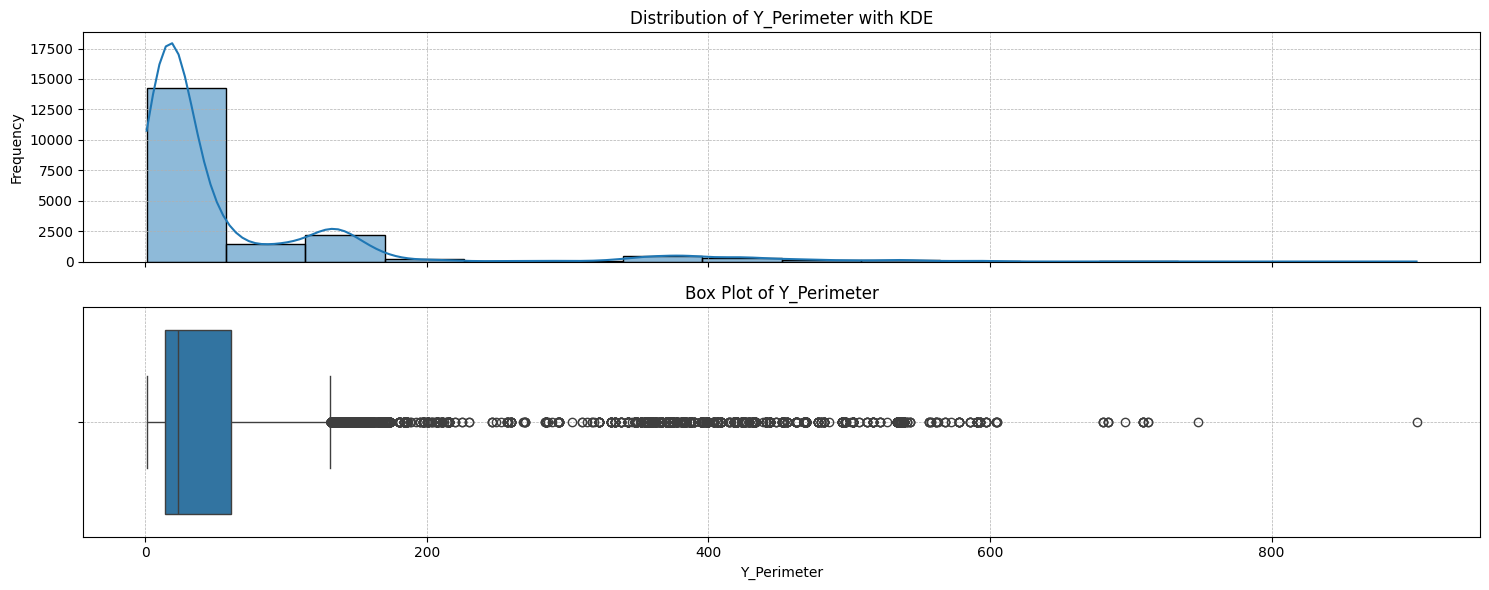

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,14.490868,0.0,14.490868


,count,mean,std,min,25%,50%,75%,max
Y_Perimeter_Overall,19219.0,64.124096,101.054178,1.0,14.0,23.0,61.0,903.0
Y_Perimeter_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y_Perimeter_Upper_Outliers,2785.0,260.325673,142.312697,132.0,140.0,162.0,387.0,903.0


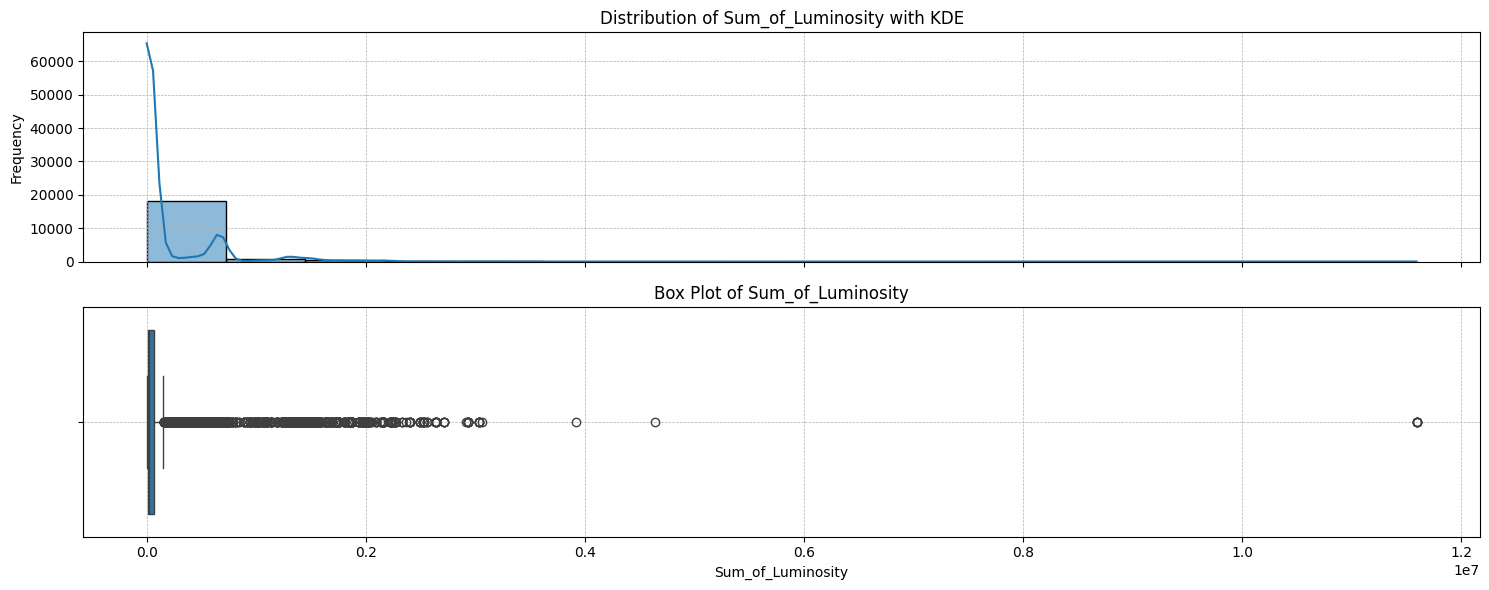

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,19.907383,0.0,19.907383


,count,mean,std,min,25%,50%,75%,max
Sum_of_Luminosity_Overall,19219.0,191846.678235,442024.694057,250.0,9848.0,18238.0,67978.0,11591414.0
Sum_of_Luminosity_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sum_of_Luminosity_Upper_Outliers,3826.0,873639.850235,631657.131858,156200.0,618605.0,674326.0,1239926.0,11591414.0


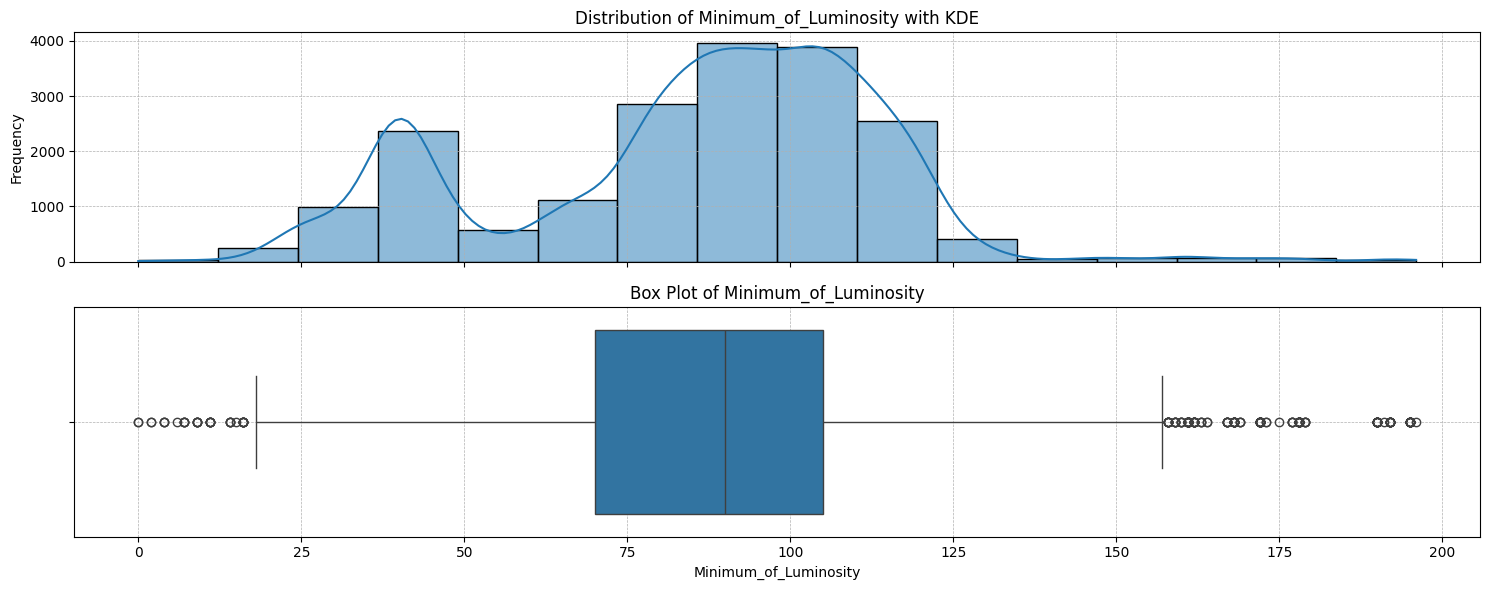

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,1.097872,0.182111,0.91576


,count,mean,std,min,25%,50%,75%,max
Minimum_of_Luminosity_Overall,19219.0,84.808419,28.800344,0.0,70.0,90.0,105.0,196.0
Minimum_of_Luminosity_Lower_Outliers,35.0,9.828571,4.967457,0.0,7.0,11.0,14.0,16.0
Minimum_of_Luminosity_Upper_Outliers,176.0,172.857955,11.956456,158.0,161.0,172.0,178.0,196.0


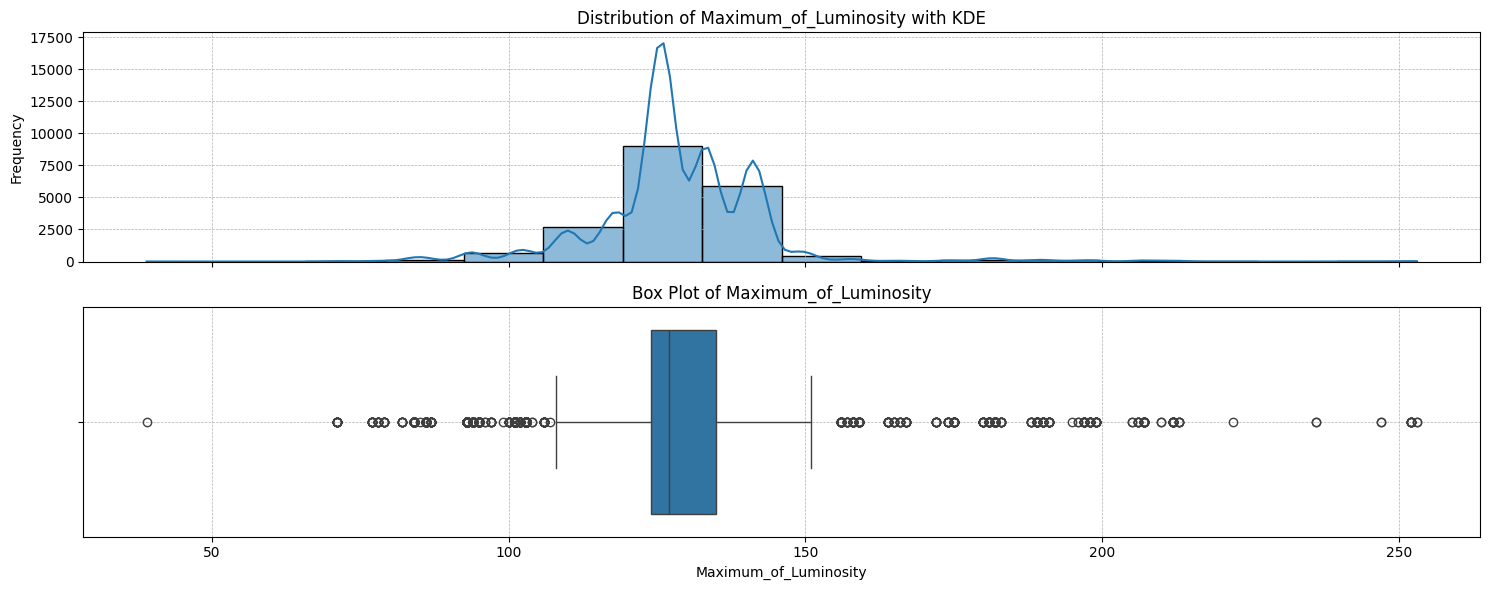

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,6.722514,4.552786,2.169728


,count,mean,std,min,25%,50%,75%,max
Maximum_of_Luminosity_Overall,19219.0,128.647380,14.196976,39.0,124.0,127.0,135.0,253.0
Maximum_of_Luminosity_Lower_Outliers,875.0,95.286857,7.915529,39.0,93.0,95.0,102.0,107.0
Maximum_of_Luminosity_Upper_Outliers,417.0,183.496403,20.806587,156.0,166.0,182.0,197.0,253.0


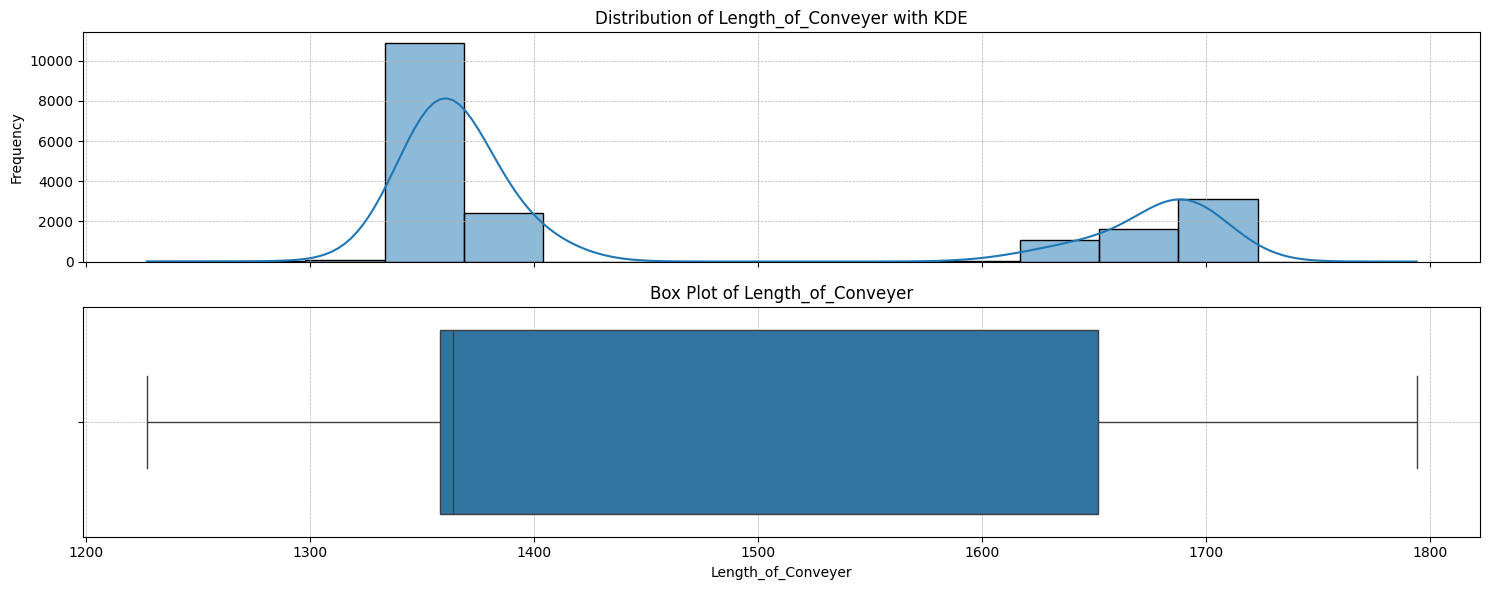

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Length_of_Conveyer_Overall,19219.0,1459.350747,145.568687,1227.0,1358.0,1364.0,1652.0,1794.0
Length_of_Conveyer_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length_of_Conveyer_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


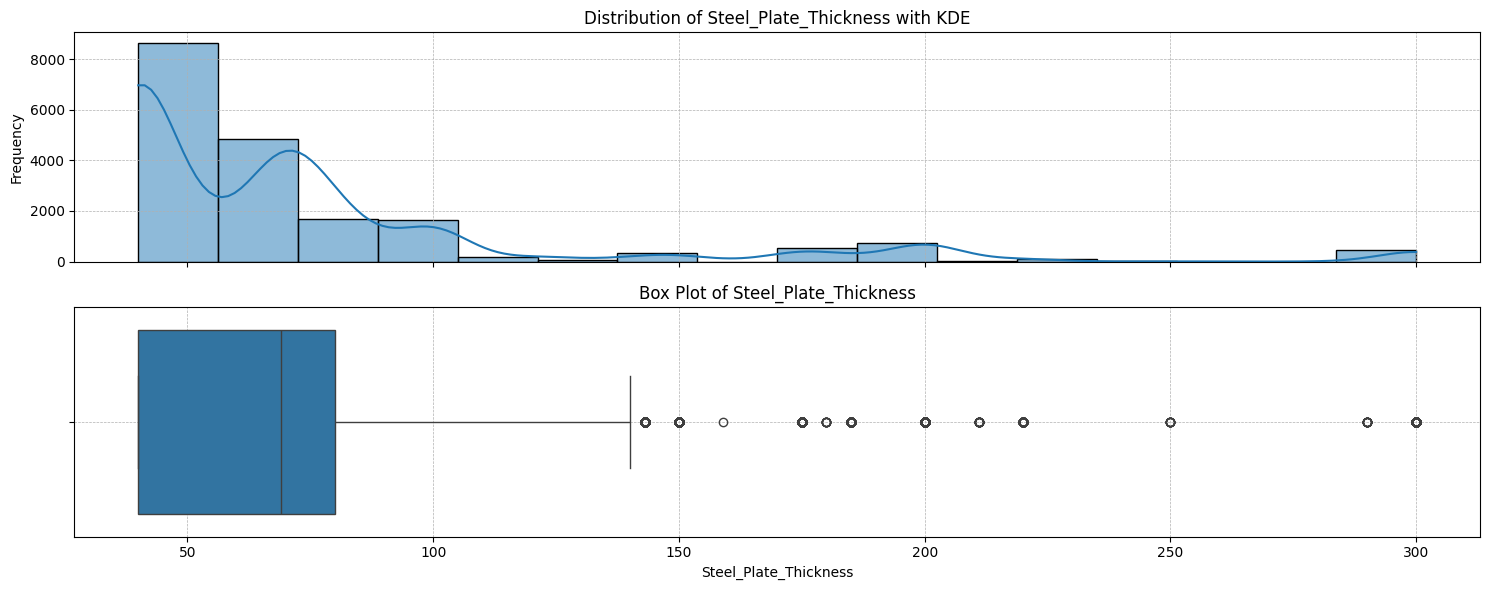

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,11.30652,0.0,11.30652


,count,mean,std,min,25%,50%,75%,max
Steel_Plate_Thickness_Overall,19219.0,76.213122,53.931960,40.0,40.0,69.0,80.0,300.0
Steel_Plate_Thickness_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Steel_Plate_Thickness_Upper_Outliers,2173.0,208.214910,50.552093,143.0,175.0,200.0,220.0,300.0


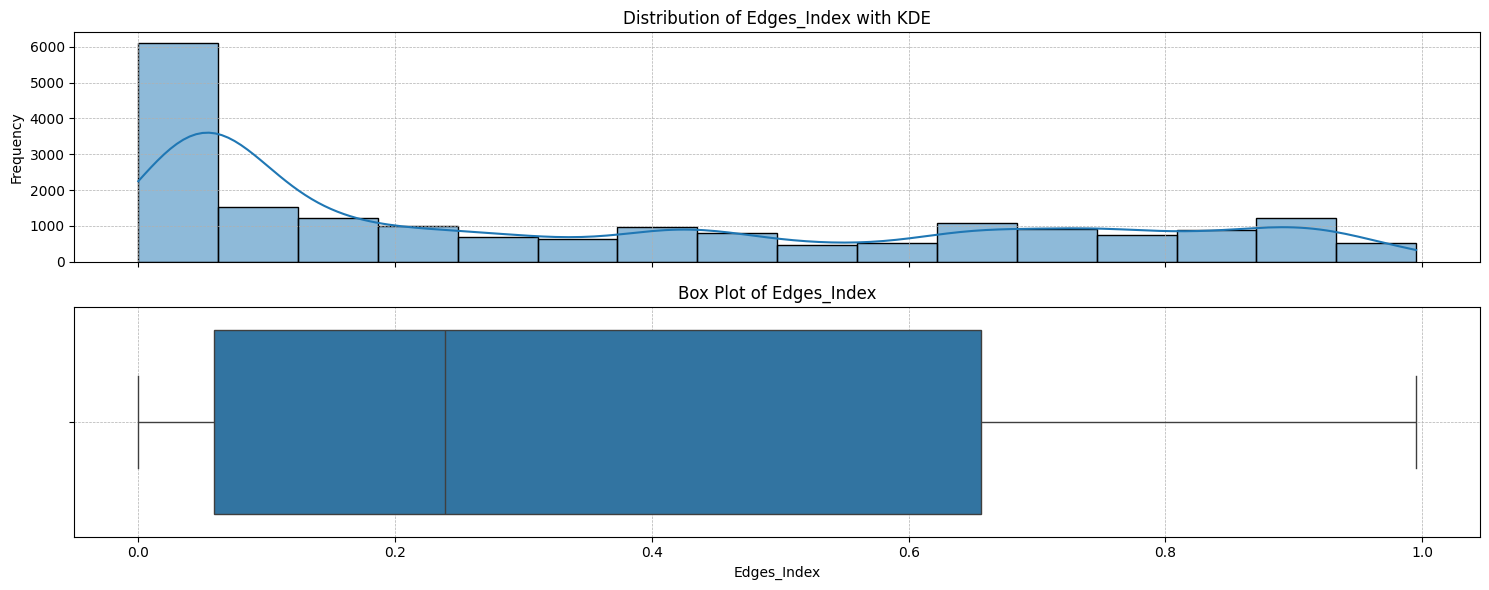

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Edges_Index_Overall,19219.0,0.352939,0.318976,0.0,0.0586,0.2385,0.6561,0.9952
Edges_Index_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edges_Index_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


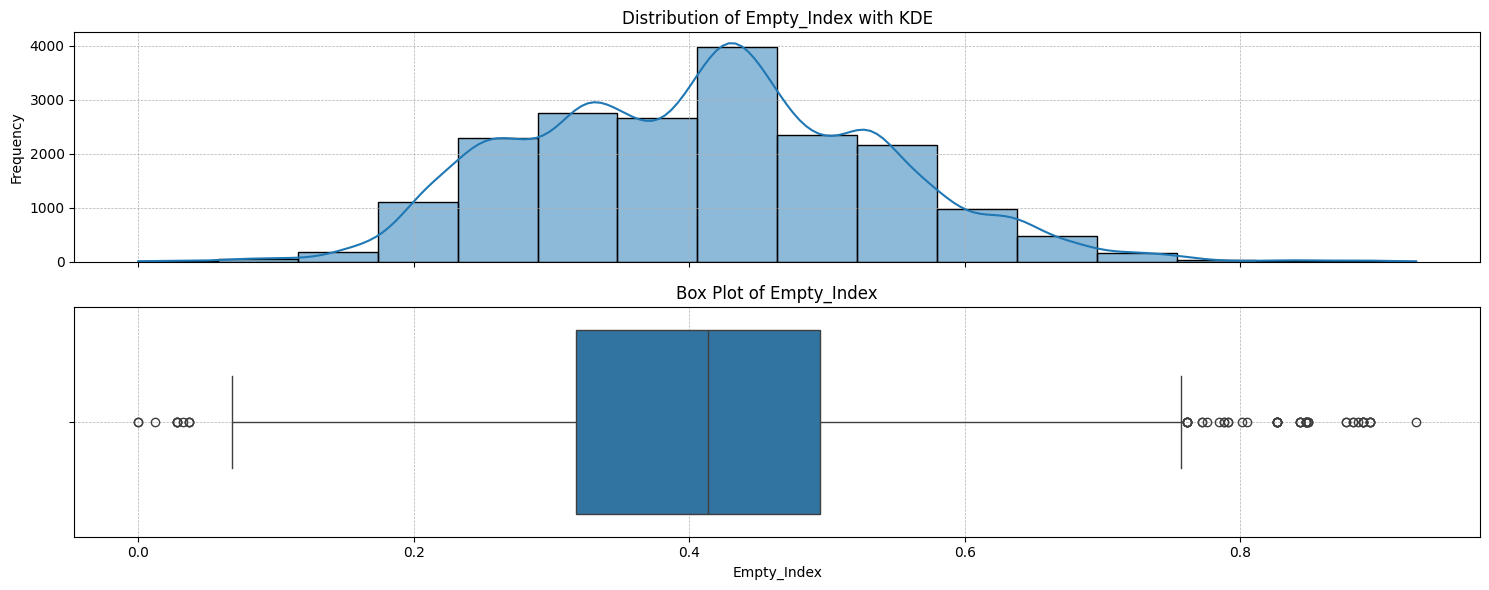

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.317394,0.057235,0.260159


,count,mean,std,min,25%,50%,75%,max
Empty_Index_Overall,19219.0,0.409309,0.124143,0.0000,0.3175,0.4135,0.4946,0.9275
Empty_Index_Lower_Outliers,11.0,0.024145,0.013846,0.0000,0.0198,0.0278,0.0345,0.0368
Empty_Index_Upper_Outliers,50.0,0.834518,0.046635,0.7612,0.7906,0.8429,0.8803,0.9275


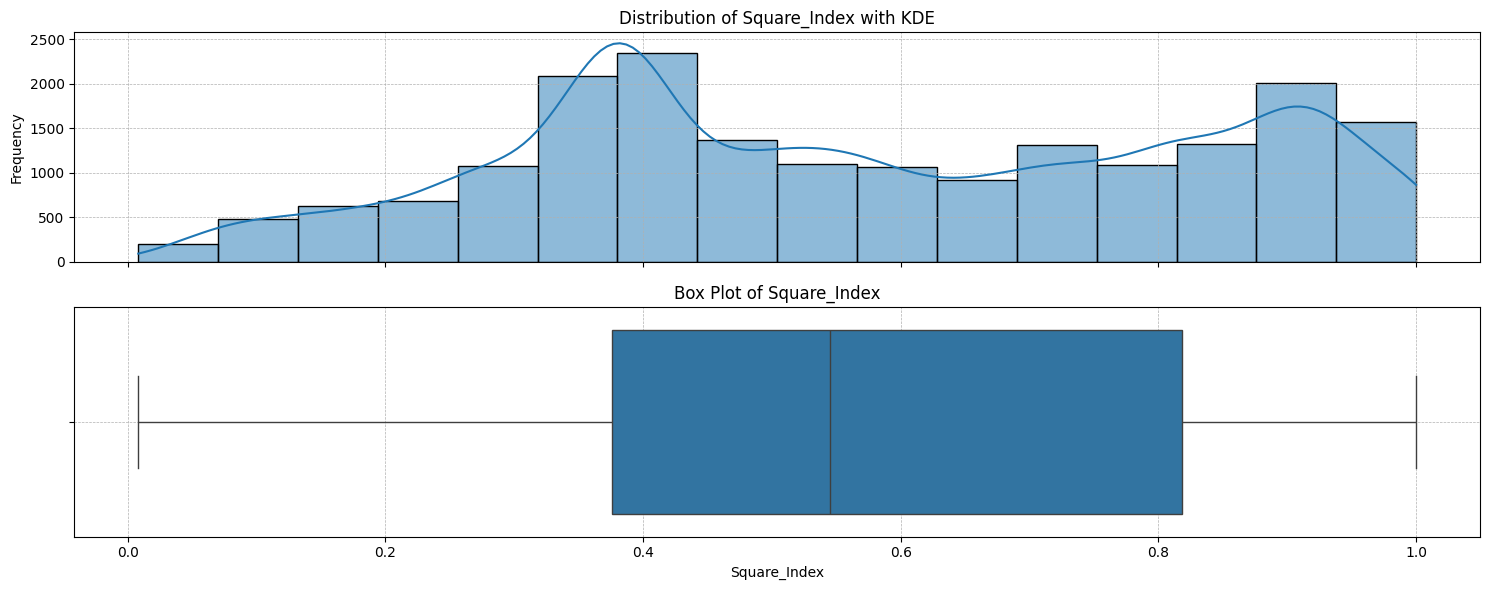

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Square_Index_Overall,19219.0,0.57452,0.259436,0.0083,0.37575,0.5454,0.8182,1.0
Square_Index_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Square_Index_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


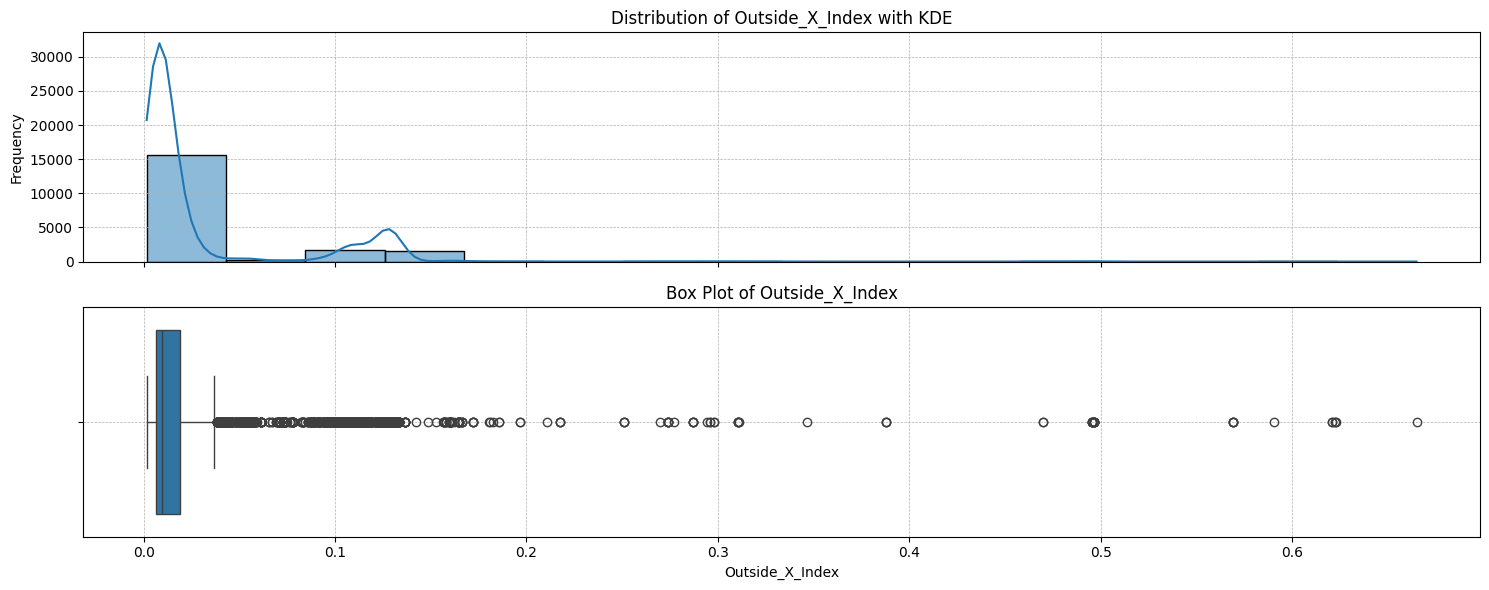

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,18.944794,0.0,18.944794


,count,mean,std,min,25%,50%,75%,max
Outside_X_Index_Overall,19219.0,0.030609,0.047302,0.0015,0.0066,0.0095,0.0191,0.6651
Outside_X_Index_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outside_X_Index_Upper_Outliers,3641.0,0.119170,0.044762,0.0382,0.1084,0.1252,0.1289,0.6651


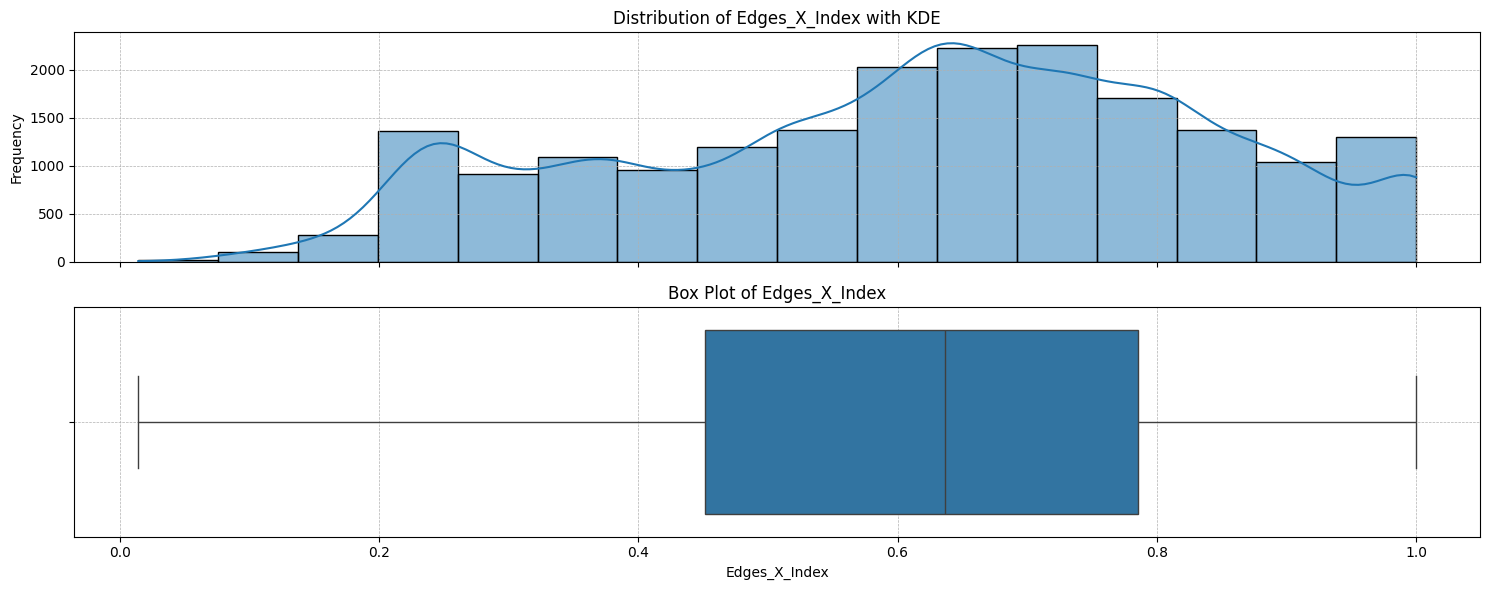

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Edges_X_Index_Overall,19219.0,0.614749,0.222391,0.0144,0.4516,0.6364,0.7857,1.0
Edges_X_Index_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edges_X_Index_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


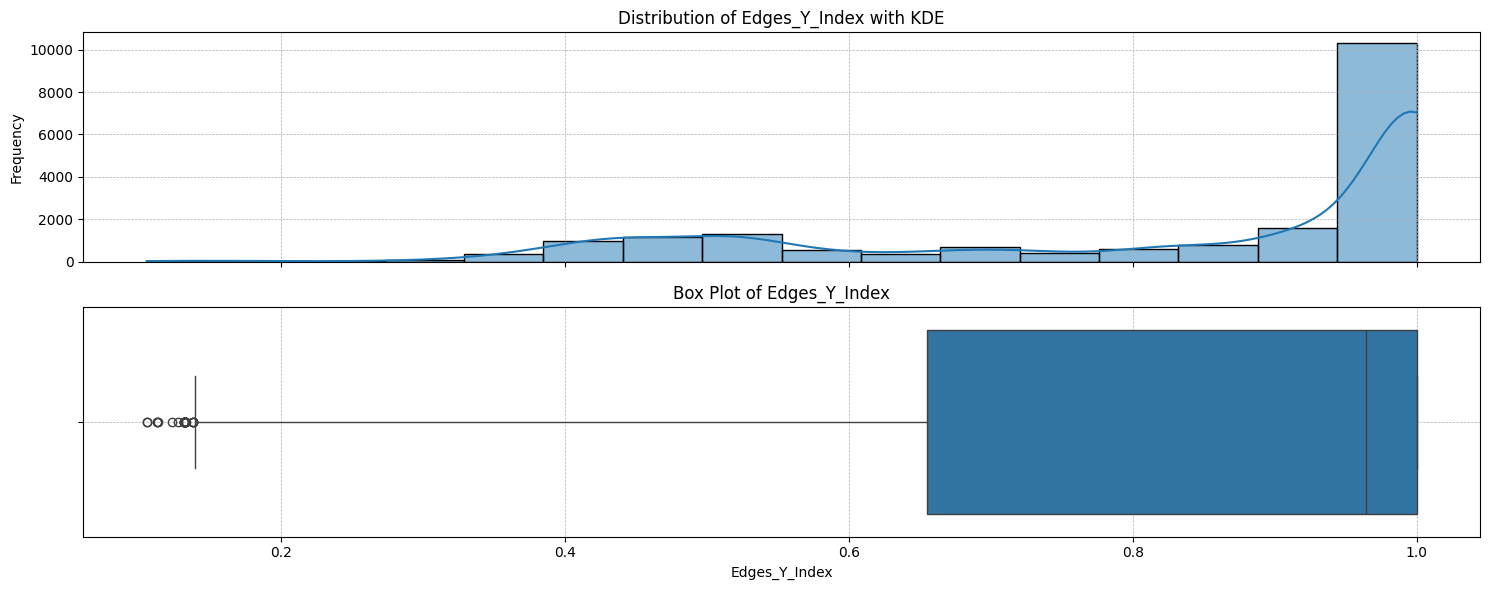

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.13008,0.13008,0.0


,count,mean,std,min,25%,50%,75%,max
Edges_Y_Index_Overall,19219.0,0.831652,0.220966,0.105,0.6552,0.9643,1.0000,1.0000
Edges_Y_Index_Lower_Outliers,25.0,0.127768,0.009976,0.105,0.1272,0.1312,0.1321,0.1379
Edges_Y_Index_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


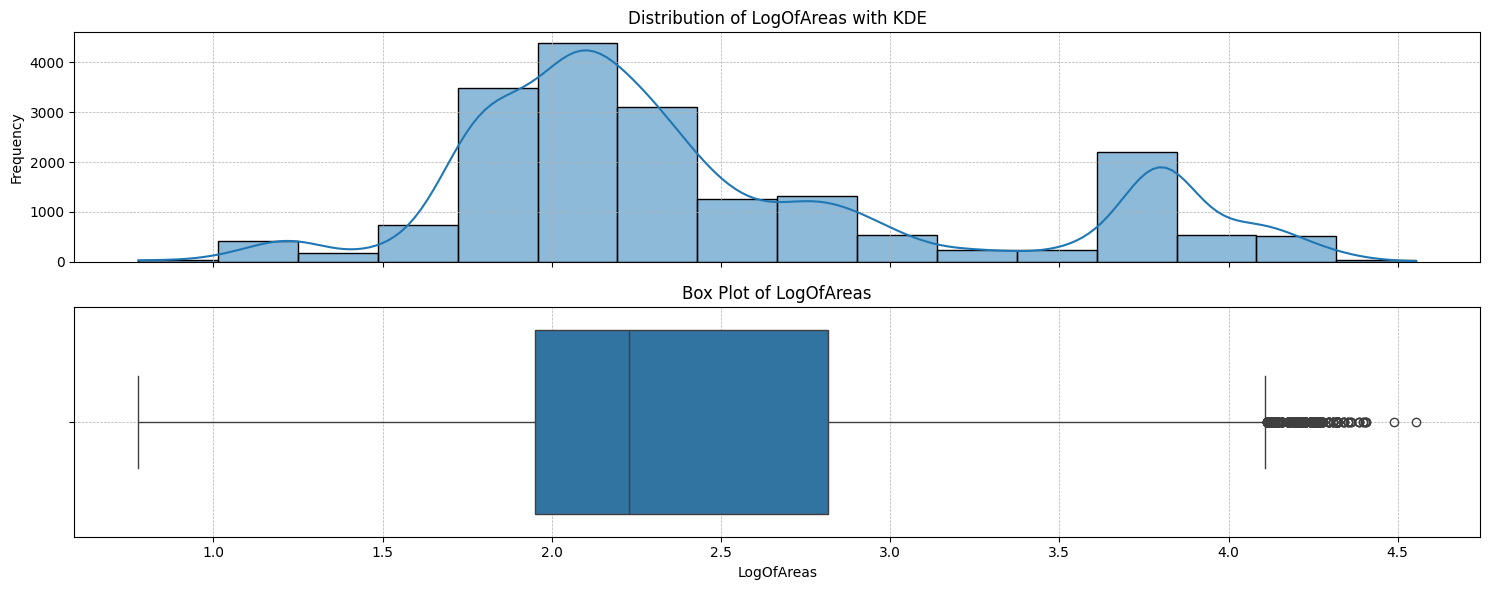

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,2.190541,0.0,2.190541


,count,mean,std,min,25%,50%,75%,max
LogOfAreas_Overall,19219.0,2.473475,0.760575,0.7782,1.9494,2.2279,2.8149,4.5543
LogOfAreas_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LogOfAreas_Upper_Outliers,421.0,4.205564,0.074079,4.1150,4.1339,4.2013,4.2547,4.5543


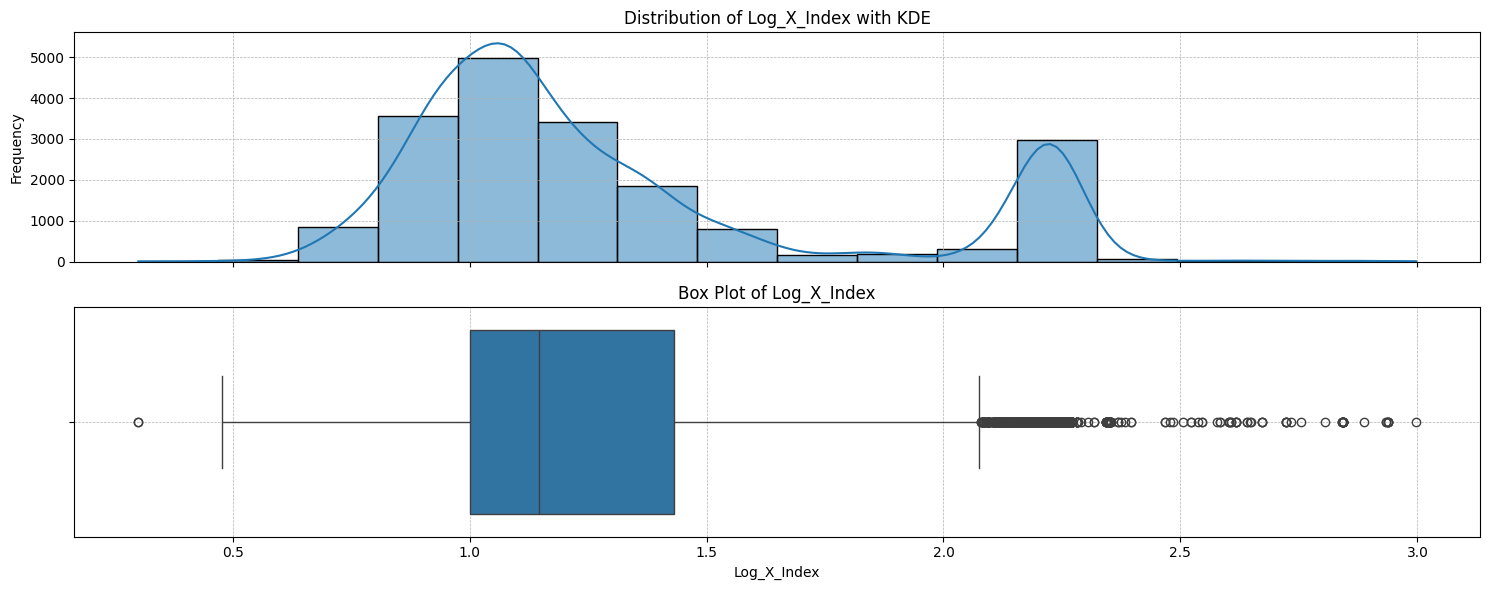

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,17.300588,0.010406,17.290182


,count,mean,std,min,25%,50%,75%,max
Log_X_Index_Overall,19219.0,1.312667,0.467848,0.3010,1.0000,1.1461,1.4314,2.9973
Log_X_Index_Lower_Outliers,2.0,0.301000,0.000000,0.3010,0.3010,0.3010,0.3010,0.3010
Log_X_Index_Upper_Outliers,3323.0,2.224956,0.077890,2.0792,2.1847,2.2355,2.2430,2.9973


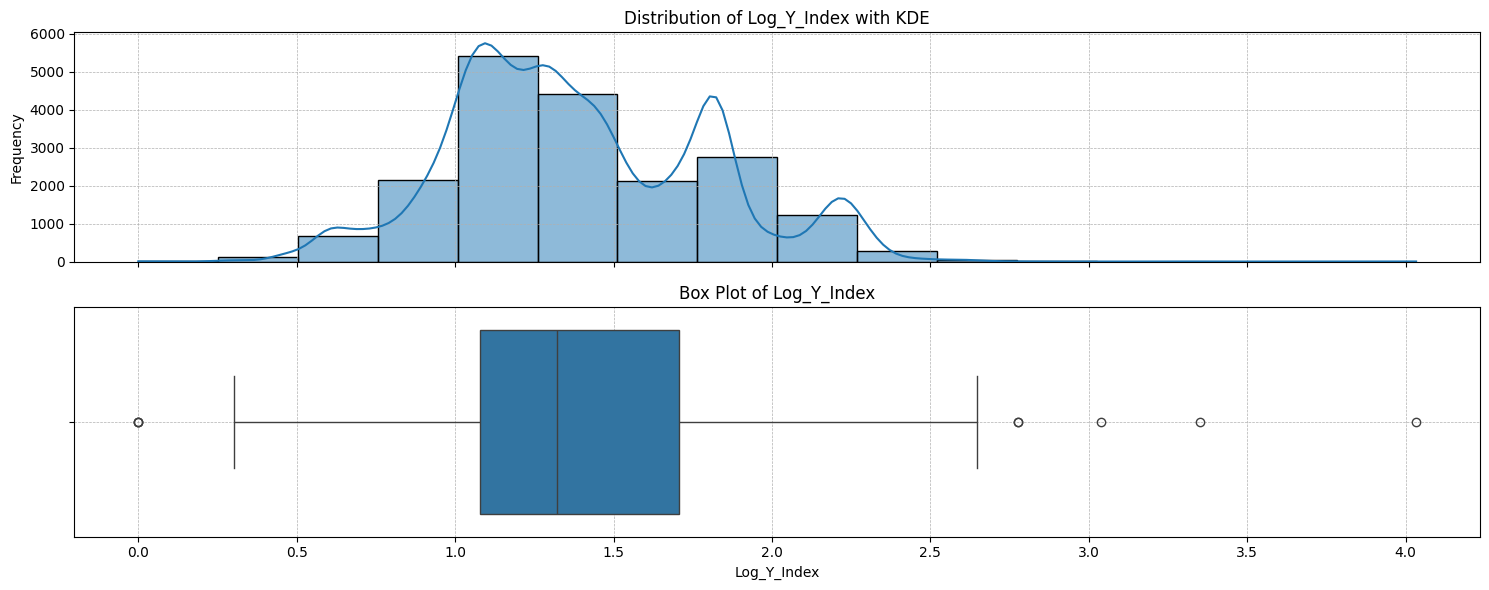

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.041625,0.01561,0.026016


,count,mean,std,min,25%,50%,75%,max
Log_Y_Index_Overall,19219.0,1.389737,0.405549,0.000,1.0792,1.3222,1.7076,4.0333
Log_Y_Index_Lower_Outliers,3.0,0.000000,0.000000,0.000,0.0000,0.0000,0.0000,0.0000
Log_Y_Index_Upper_Outliers,5.0,3.195100,0.524965,2.776,2.7760,3.0394,3.3508,4.0333


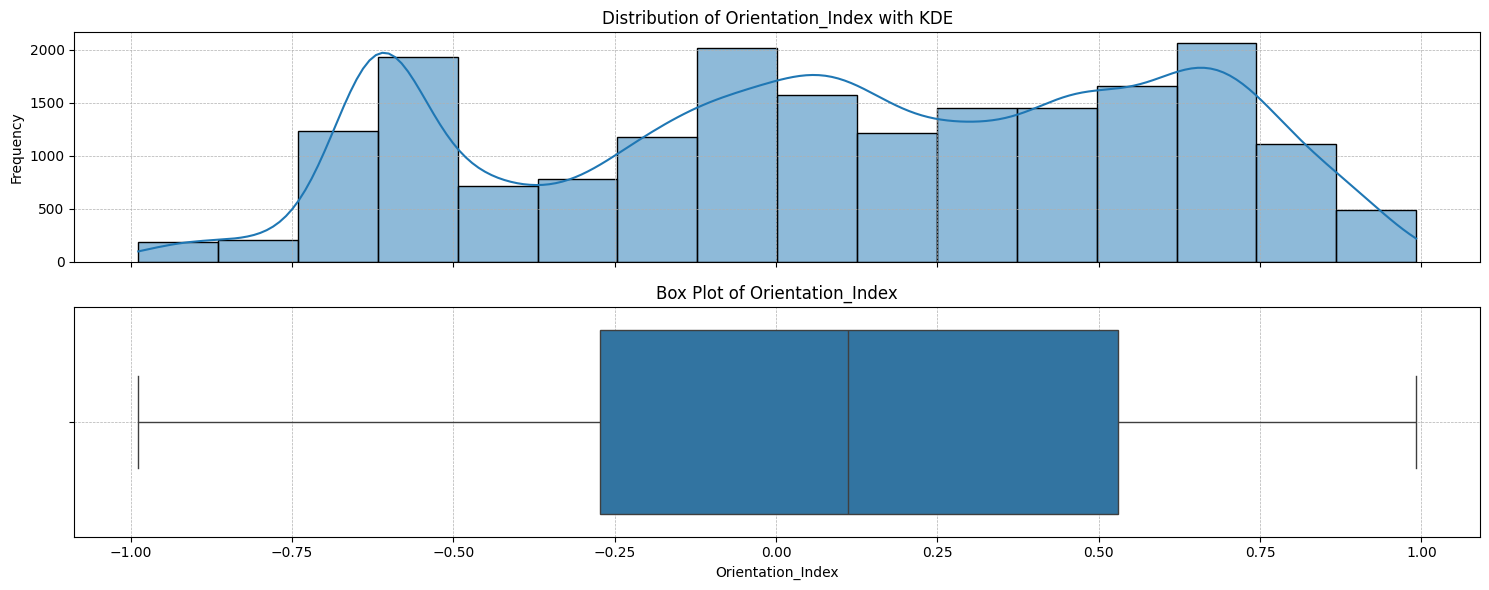

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Orientation_Index_Overall,19219.0,0.102742,0.487681,-0.9884,-0.2727,0.1111,0.5294,0.9917
Orientation_Index_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orientation_Index_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


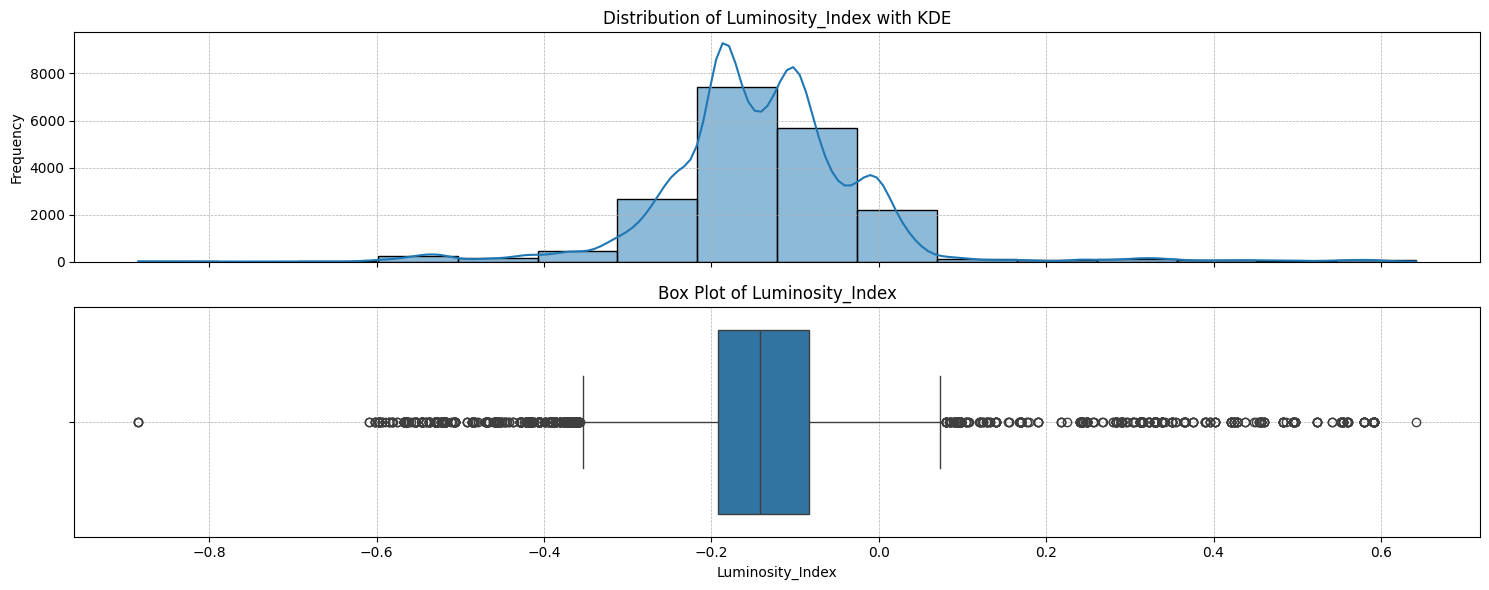

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,5.197981,3.121911,2.076071


,count,mean,std,min,25%,50%,75%,max
Luminosity_Index_Overall,19219.0,-0.138382,0.120344,-0.885,-0.1925,-0.1426,-0.0840,0.6421
Luminosity_Index_Lower_Outliers,600.0,-0.459228,0.080839,-0.885,-0.5291,-0.4283,-0.3864,-0.3573
Luminosity_Index_Upper_Outliers,399.0,0.309247,0.155267,0.080,0.1693,0.3146,0.4245,0.6421


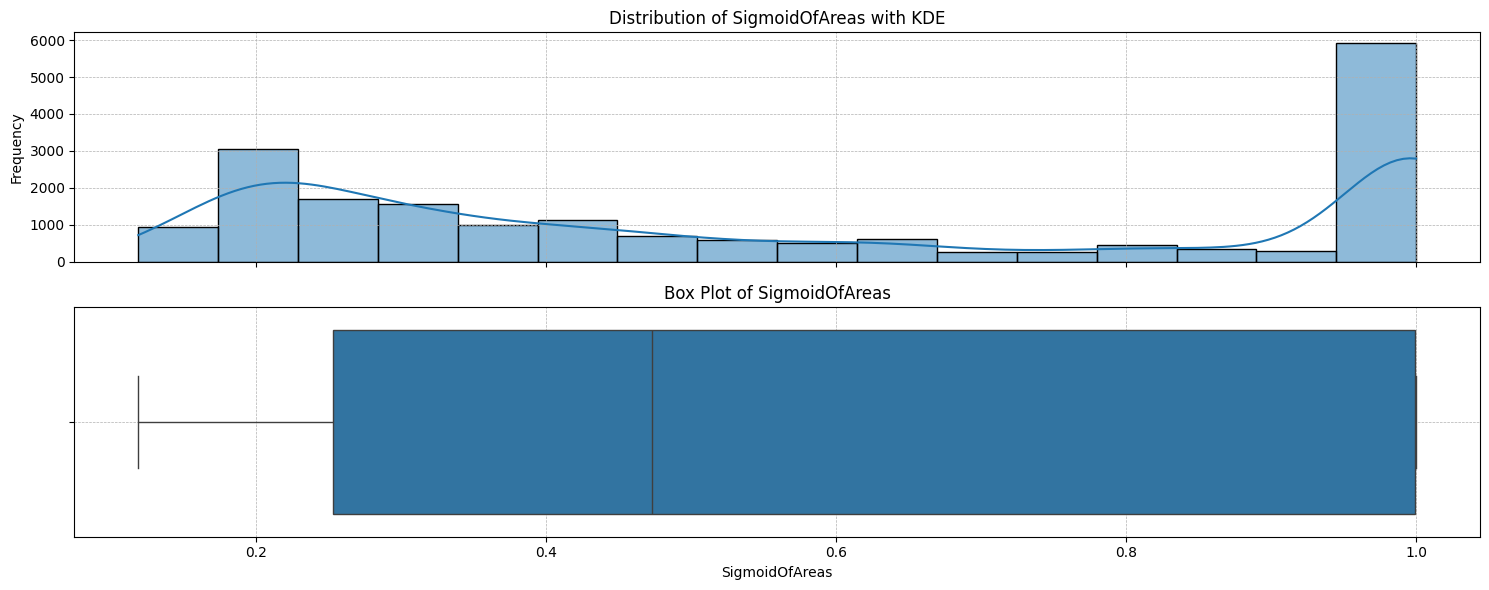

,Outlier Percentage,Lower Outliers Percentage,Upper Outliers Percentage
0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
SigmoidOfAreas_Overall,19219.0,0.571902,0.332219,0.119,0.2532,0.4729,0.9994,1.0
SigmoidOfAreas_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SigmoidOfAreas_Upper_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for col in num_cols:
    outliers, summary = sd.analyze.numerical_feature(df=train, feature=col)
    display(outliers)
    display(summary)

In [16]:
cat_cols

['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']

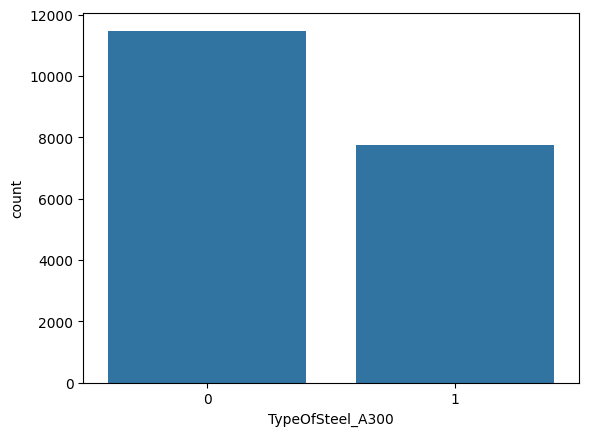

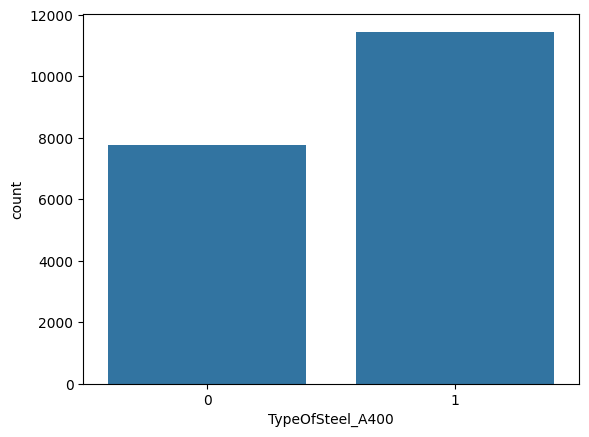

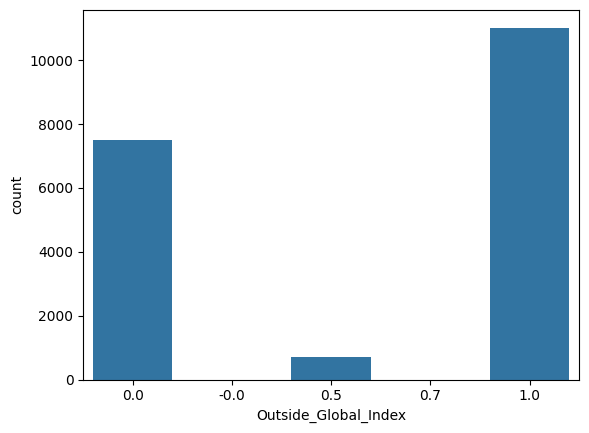

In [17]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.show()

In [19]:
train = pd.read_csv("../input/train.csv")

# Define the target columns for multi-label classification
target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Create a single target for statification by checking if any label is present
train["faulty"] = train[target_columns].max(axis=1)

In [20]:
train.faulty.value_counts()

faulty
1    18401
0      818
Name: count, dtype: int64

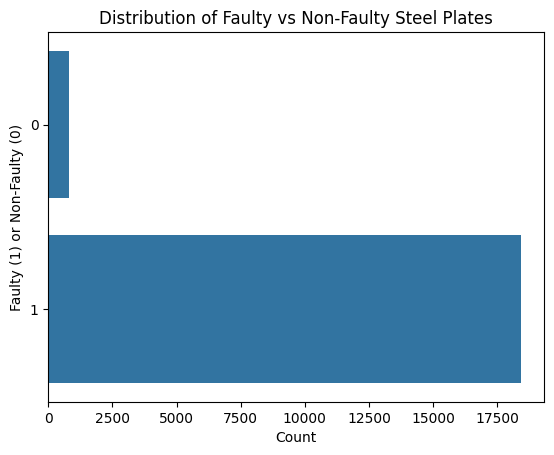

In [23]:
sns.countplot(data=train, y="faulty")
plt.title("Distribution of Faulty vs Non-Faulty Steel Plates")
plt.xlabel("Count")
plt.ylabel("Faulty (1) or Non-Faulty (0)")
plt.show()

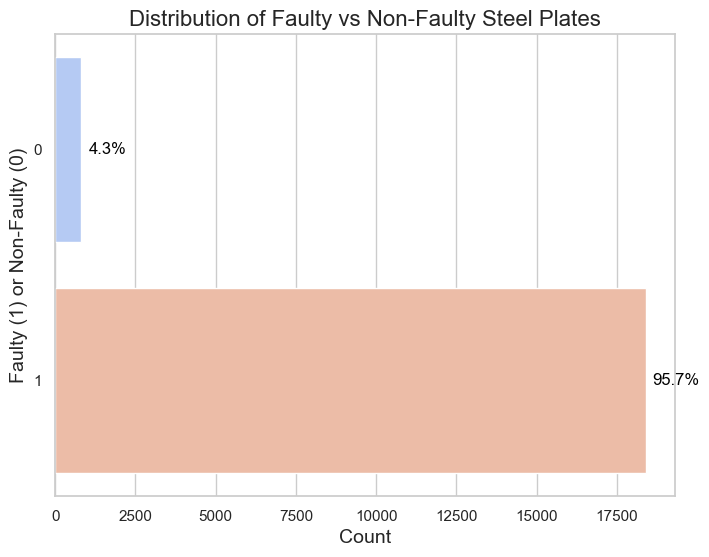

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size and aesthetics
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the countplot with 'faulty' as hue and custom color palette
ax = sns.countplot(data=train, y="faulty", hue="faulty", palette="coolwarm", legend=False)

# Add percentage labels on the bars
total = len(train)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

# Set the title and labels with larger font sizes
plt.title("Distribution of Faulty vs Non-Faulty Steel Plates", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Faulty (1) or Non-Faulty (0)", fontsize=14)

# Remove top and right spines for a cleaner look
# sns.despine()

# Show the plot
plt.show()

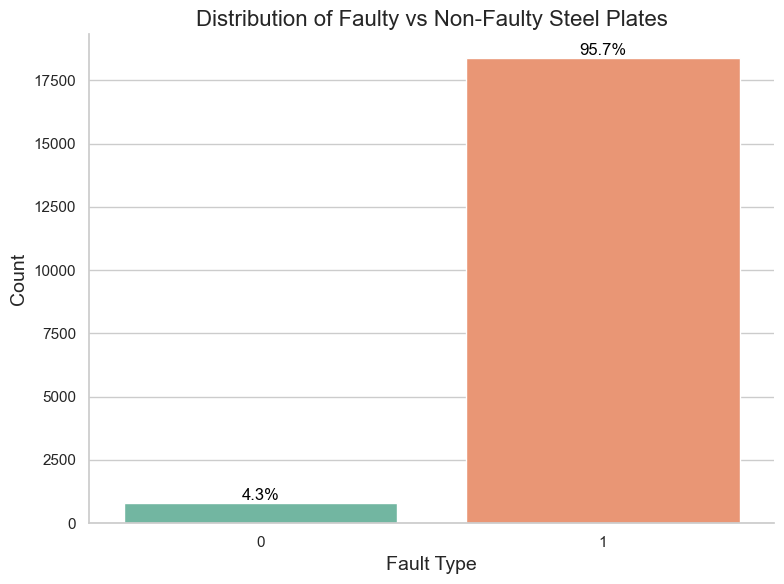

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count_with_percentages(data, variable, title="Count Plot", xlabel=None, ylabel="Count", palette="Set2"):
    """
    Function to create a vertical count plot with percentage labels for binary or categorical variables.
    
    Parameters:
    data (pd.DataFrame): The dataset containing the variable to plot.
    variable (str): The name of the variable/column in the dataset to plot.
    title (str): The title of the plot. Default is "Count Plot".
    xlabel (str): The label for the x-axis. If None, it uses the variable name.
    ylabel (str): The label for the y-axis. Default is "Count".
    palette (str): The color palette for the plot. Default is "Set2".
    
    Returns:
    None: Displays the plot.
    """
    
    # Set default xlabel to the variable if not provided
    if xlabel is None:
        xlabel = variable
    
    # Set plot size and aesthetics
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid")
    
    # Create the vertical countplot with hue for the variable and custom color palette
    ax = sns.countplot(data=data, x=variable, hue=variable, palette=palette, legend=False, color=sns.color_palette("coolwarm"))
    
    # Calculate total number of observations
    total = len(data)
    
    # Add percentage labels to each bar
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')
    
    # Set title and axis labels with larger font sizes
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # Remove top and right spines for a cleaner look
    sns.despine()
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_count_with_percentages(train, 'faulty', title="Distribution of Faulty vs Non-Faulty Steel Plates", xlabel="Fault Type", ylabel="Count")


In [33]:
train[target_columns].sum()

Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64

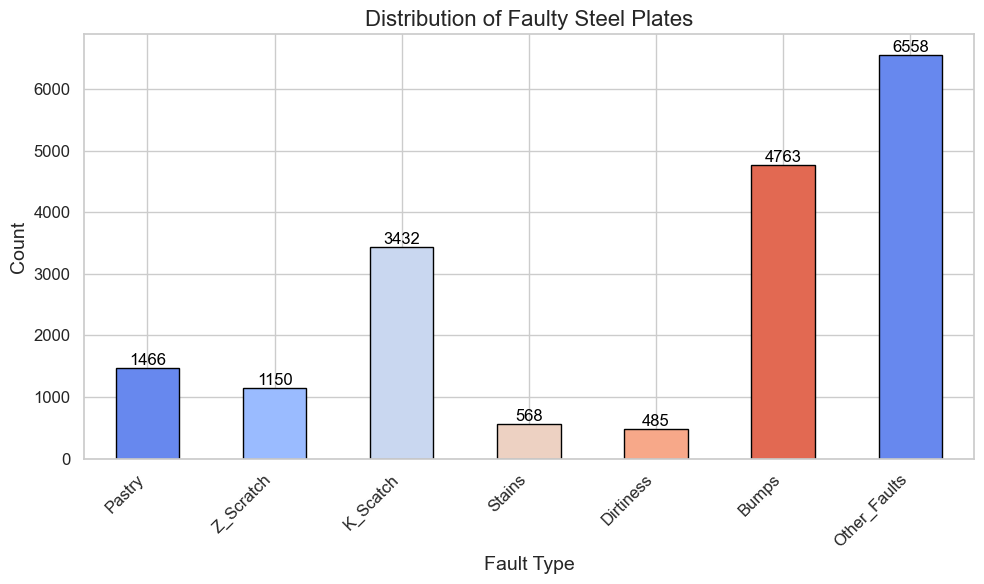

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fault_distribution(data, target_columns):
    """
    Function to generate a publishing-quality bar plot for the distribution of target columns.
    
    Parameters:
    data (pd.DataFrame): The dataset containing the target columns.
    target_columns (list): List of target columns (fault types) to plot.
    
    Returns:
    None: Displays the plot.
    """
    
    # Set the plot size and aesthetics
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    # Sum up the counts for each target column
    fault_counts = data[target_columns].sum()

    # Create the bar plot
    ax = fault_counts.plot(kind="bar", color=sns.color_palette("coolwarm"), edgecolor='black')

    # Add value labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

    # Set title and labels with larger font sizes
    plt.title("Distribution of Faulty Steel Plates", fontsize=16)
    plt.xlabel("Fault Type", fontsize=14)
    plt.ylabel("Count", fontsize=14)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)

    # Remove top and right spines for a cleaner look
    # sns.despine()

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Example usage
plot_fault_distribution(train, target_columns)